In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gpd
import xarray as xr
import regionmask

/home/sara/.local/lib/python3.8/site-packages/geopandas/_compat.py:124: UserWarning: The Shapely GEOS version (3.11.1-CAPI-1.17.1) is incompatible with the GEOS version PyGEOS was compiled with (3.10.4-CAPI-1.16.2). Conversions between both will be slow.
  warnings.warn(
/tmp/ipykernel_8704/590659244.py:4: DeprecationWarning: Shapely 2.0 is installed, but because PyGEOS is also installed, GeoPandas still uses PyGEOS by default. However, starting with version 0.14, the default will switch to Shapely. To force to use Shapely 2.0 now, you can either uninstall PyGEOS or set the environment variable USE_PYGEOS=0. You can do this before starting the Python process, or in your code before importing geopandas:

import os
os.environ['USE_PYGEOS'] = '0'
import geopandas

In the next release, GeoPandas will switch to using Shapely by default, even if PyGEOS is installed. If you only have PyGEOS installed to get speed-ups, this switch should be smooth. However, if you are using PyGEOS directly (ca

In [2]:
file = r"/home/sara/Documenti/GitHub/Climate-and-conflict/Datasets/cru_ts4.07.1901.2022.pre.dat.nc"
file2 = r"/home/sara/Documenti/GitHub/Climate-and-conflict/Datasets/cru_ts4.07.1901.2022.tmx.dat.nc"

file_paths_list =[file,file2]
monthly_forecast=xr.Dataset()

for file in file_paths_list:
        monthly_forecast = xr.merge([monthly_forecast,xr.open_mfdataset(file)], compat='override')

        
states_gdf = gpd.read_file(r"/home/sara/Documenti/GitHub/Climate-and-conflict/Datasets/som_adm_ocha_itos_20230308_shp/som_admbnda_adm1_ocha_20230308.shp") 

In [3]:
#Limit the lat-lon and time

def get_aoi(shp, world=True):
    lon_lat = {}
    # Get lat min, max
    aoi_lat = [float(shp.total_bounds[1]), float(shp.total_bounds[3])]
    aoi_lon = [float(shp.total_bounds[0]), float(shp.total_bounds[2])]

    lon_lat["lon"] = aoi_lon
    lon_lat["lat"] = aoi_lat
    return lon_lat

bounds = get_aoi(states_gdf)

In [4]:
start_date = '1901-01-01'
end_date = '2022-12-31'

region = monthly_forecast[["pre",'tmx']].sel(
    time=slice(start_date, end_date),
    lon=slice(bounds["lon"][0], bounds["lon"][1]),
    lat=slice(bounds["lat"][0], bounds["lat"][1]))

In [5]:
region_mask = regionmask.mask_3D_geopandas(states_gdf,
                                         monthly_forecast.lon,
                                         monthly_forecast.lat)

temp_pre = region.where(region_mask)
summary = temp_pre.groupby("time").mean(["lat", "lon"]).to_dataframe().reset_index()

In [ ]:
replacement_dict = {0  :  'Awdal',
                    1  :  'Bakool',
                    2  :  'Banadir',
                    3  :  'Bari',
                    4  :  'Bay',
                    5  :  'Galgaduud',
                    6  :  'Gedo',
                    7  :  'Hiraan',
                    8  :  'Lower_Juba',
                    9  :  'Lower_Shabelle',
                    10 :  'Middle_Juba',
                    11 :  'Middle_Shabelle',
                    12 :  'Mudug',
                    13 :  'Nugaal',
                    14 :  'Sanaag',
                    15 :  'Sool',
                    16 :  'Togdheer',
                    17 :  'Woqooyi_Galbeed'}

temp_pre['admin1'] = temp_pre['region'].replace(replacement_dict)
temp_pre.drop('region', axis=1, inplace=True)

In [8]:
def get_aoi(shp, world=True):
    lon_lat = {}
    # Get lat min, max
    aoi_lat = [float(shp.total_bounds[1]), float(shp.total_bounds[3])]
    aoi_lon = [float(shp.total_bounds[0]), float(shp.total_bounds[2])]

    lon_lat["lon"] = aoi_lon
    lon_lat["lat"] = aoi_lat
    return lon_lat

bounds = get_aoi(regions_nev)

In [10]:
summary = monthly_forecast.where(region_mask).groupby("time").mean(["lat", "lon"]).to_dataframe().reset_index()

In [6]:
replacement_dict = {0  :  'Awdal',
1    :         'Bakool',
2      :       'Banadir',
3      :         'Bari',
4       :         'Bay',
5        :  'Galgaduud',
6          :      'Gedo',
7          :   'Hiraan',
8   :       'Lower Juba',
9   :   'Lower Shabelle',
10  :      'Middle Juba',
11   : 'Middle Shabelle',
12    :          'Mudug',
13    :        'Nugaal',
14      :       'Sanaag',
15       :        'Sool',
16        :   'Togdheer',
17   : 'Woqooyi Galbeed'}

In [7]:
summary['region'] = summary['region'].replace(replacement_dict)

In [44]:
# merge states_gdf with summary1 based on column 'region' even if some regions are missing
start_date = '1997-01-16'
summary1 = summary[summary['time']==start_date]
summary1['region'] = summary1['region'].replace(replacement_dict)
merged = states_gdf.merge(summary1, left_on='ADM1_EN', right_on='region', how='outer')

/tmp/ipykernel_8704/299611646.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  summary1['region'] = summary1['region'].replace(replacement_dict)


In [45]:
one_month_region = monthly_forecast["tmx"].sel(
    time=start_date,
    lon=slice(bounds["lon"][0], bounds["lon"][1]),
    lat=slice(bounds["lat"][0], bounds["lat"][1]))

one_month_region_p = monthly_forecast["pre"].sel(
    time=slice(start_date, start_date),
    lon=slice(bounds["lon"][0], bounds["lon"][1]),
    lat=slice(bounds["lat"][0], bounds["lat"][1]))

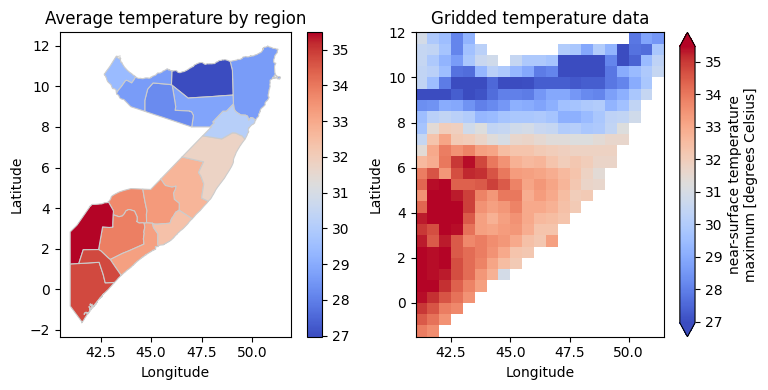

In [46]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 4))

from mpl_toolkits.axes_grid1 import make_axes_locatable

# Assuming you have GeoDataFrames 'merged' and 'one_month_region' already defined

# Determine the color scale limits based on your data
vmin = merged['tmx'].min()
vmax = merged['tmx'].max()

# Plot the first map - Regions of Somalia colored by tmx
cax1 = merged.plot(column='tmx', cmap='coolwarm', linewidth=0.8, ax=ax1, edgecolor='0.8', legend=True, vmin=vmin, vmax=vmax)
ax1.set_title('Average temperature by region')
ax1.set_xlabel('Longitude')
ax1.set_ylabel('Latitude')

# Plot the second map - two_months_region
cax2 = one_month_region.plot(ax=ax2, cmap='coolwarm', vmin=vmin, vmax=vmax)
ax2.set_title('Gridded temperature data')
ax2.set_xlabel('Longitude')
ax2.set_ylabel('Latitude')
# Create a common colorbar for both subplots
#divider = make_axes_locatable(ax2)
#cax = divider.append_axes("right", size="5%", pad=0.05)
#plt.colorbar(cax=cax, mappable=cax2)

plt.tight_layout()
plt.show()

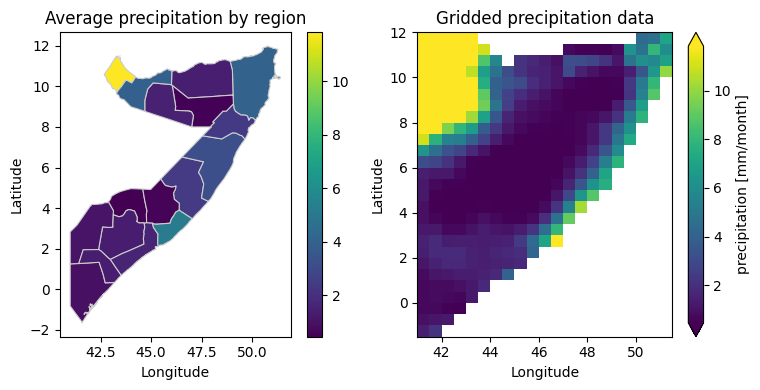

In [47]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 4))

# Assuming you have GeoDataFrames 'merged' and 'one_month_region' already defined

# Determine the color scale limits based on your data
vmin = merged['pre'].min()
vmax = merged['pre'].max()

# Plot the first map - Regions of Somalia colored by tmx
cax1 = merged.plot(column='pre', cmap='viridis', linewidth=0.8, ax=ax1, edgecolor='0.8', legend=True, vmin=vmin, vmax=vmax)
ax1.set_title('Average precipitation by region')
ax1.set_xlabel('Longitude')
ax1.set_ylabel('Latitude')

# Plot the second map - two_months_region
cax2 = one_month_region_p.plot(ax=ax2, cmap='viridis', vmin=vmin, vmax=vmax)
ax2.set_title('Gridded precipitation data')
ax2.set_xlabel('Longitude')
ax2.set_ylabel('Latitude')
# Create a common colorbar for both subplots
#divider = make_axes_locatable(ax2)
#cax = divider.append_axes("right", size="5%", pad=0.05)
#plt.colorbar(cax=cax, mappable=cax2)

plt.tight_layout()
plt.show()

In [48]:
#summary.to_csv('temp_pre_new.csv', index=False)

In [49]:
#subset to take only middle shabelle
middle_shabelle = summary[summary['region']=='Middle Shabelle']


In [52]:
#subset from 1997 to 2022
middle_shabelle = middle_shabelle[(middle_shabelle['time'] > '1997-01-01') & (middle_shabelle['time'] < '2022-01-01')]
middle_shabelle

,time,region,pre,tmx
19594,1997-01-16,Middle Shabelle,5.200000,32.360004
19611,1997-02-15,Middle Shabelle,1.860000,32.919998
19628,1997-03-16,Middle Shabelle,25.420002,34.020000
19645,1997-04-16,Middle Shabelle,84.779991,33.860004
19662,1997-05-16,Middle Shabelle,42.820000,32.660000
...,...,...,...,...
24609,2021-08-16,Middle Shabelle,18.039999,30.740000
24626,2021-09-16,Middle Shabelle,9.740000,31.720001
24643,2021-10-16,Middle Shabelle,76.260002,32.079998
24660,2021-11-16,Middle Shabelle,69.600006,32.520000
